In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./data/jejutrash.csv')
df.head()

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,선불금액,배출량,데이터기준일자
0,2018-01-01,서귀포시,남원읍,291408.897,18744.131,219588.857,529741.884,1239600,37110,2020-12-15
1,2018-01-02,서귀포시,남원읍,290944.660,27781.676,166779.581,485505.917,1569850,47002,2020-12-15
2,2018-01-03,서귀포시,남원읍,287121.506,27767.075,181151.435,496040.016,1405650,42080,2020-12-15
3,2018-01-04,서귀포시,남원읍,279036.104,27045.987,188198.647,494280.738,1390250,41610,2020-12-15
4,2018-01-05,서귀포시,남원읍,287205.972,24824.666,171332.544,483363.182,1585700,47485,2020-12-15


In [3]:
correlation = df[['총 유동인구', '배출량']].corr()
print(correlation)

          총 유동인구       배출량
총 유동인구  1.000000  0.574202
배출량     0.574202  1.000000


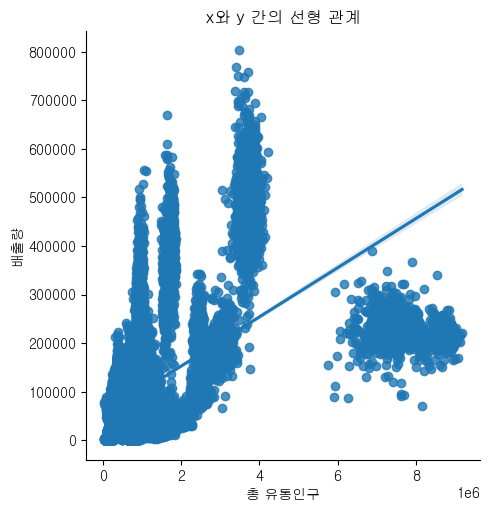

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='총 유동인구', y='배출량', data=df)
plt.title('x와 y 간의 선형 관계')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# 독립변수(x), 종속변수(y)
X = df[['총 유동인구']] 
y = df['배출량']

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀 계수와 절편
print(f'기울기 (coef): {model.coef_[0]}')
print(f'절편 (intercept): {model.intercept_}')
print(f'R² score: {model.score(X, y)}')  # 결정계수


기울기 (coef): 0.0506795994717278
절편 (intercept): 51113.49908632477
R² score: 0.3297081672064792


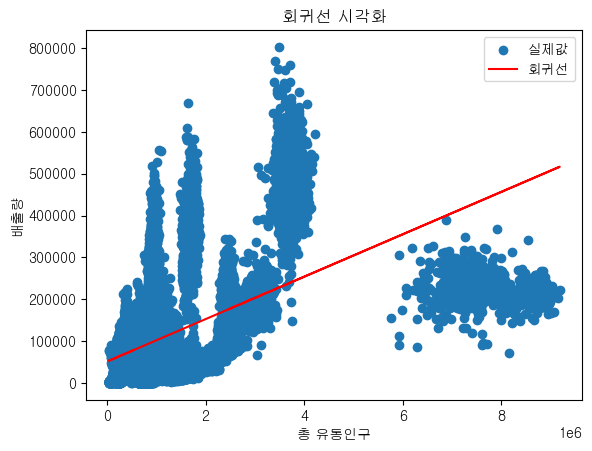

In [15]:
df['예측값'] = model.predict(X)

plt.scatter(df['총 유동인구'], df['배출량'], label='실제값')
plt.plot(df['총 유동인구'], df['예측값'], color='red', label='회귀선')
plt.xlabel('총 유동인구')
plt.ylabel('배출량')
plt.legend()
plt.title('회귀선 시각화')
plt.show()


In [16]:
print(f'R² score: {model.score(X, y)}')


R² score: 0.3297081672064792


In [19]:
df_filtered = df[df['총 유동인구'] < 5_000_000]

X = df_filtered[['총 유동인구']]  # 2D로
y = df_filtered['배출량']

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀 계수와 절편
print(f'기울기 (coef): {model.coef_[0]}')
print(f'절편 (intercept): {model.intercept_}')
print(f'R² score: {model.score(X, y)}')  # 결정계수



기울기 (coef): 0.09423632096631215
절편 (intercept): 15593.21020534393
R² score: 0.5073313077707176


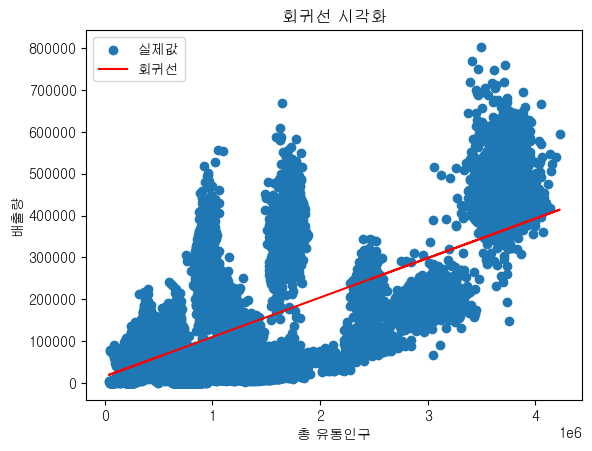

In [20]:
df_filtered['예측값'] = model.predict(X)

plt.scatter(df_filtered['총 유동인구'], df_filtered['배출량'], label='실제값')
plt.plot(df_filtered['총 유동인구'], df_filtered['예측값'], color='red', label='회귀선')
plt.xlabel('총 유동인구')
plt.ylabel('배출량')
plt.legend()
plt.title('회귀선 시각화')
plt.show()